<a href="https://colab.research.google.com/github/sajjadjim/Data-Minning-And-Machine-Learning/blob/main/diabetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.neural_network import MLPClassifier

In [ ]:
# 1. Load and Explore the Dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset/diabetic.csv')  # Replace with your dataset filename
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()

Dataset Head:
    encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No      

In [ ]:
print(data.shape)

(101766, 50)


In [ ]:
data.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [ ]:
# 2. Data Preprocessing
# Handle missing values
# Select only numerical features for imputation
numerical_features = data.select_dtypes(include=np.number).columns

# Apply imputation to numerical features
imputer = SimpleImputer(strategy='mean')
data[numerical_features] = imputer.fit_transform(data[numerical_features])

In [ ]:
# Now proceed with encoding categorical variables
label_encoders = {}
for name in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[name] = le.fit_transform(data[name])
    label_encoders[name] = le

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

print("\nProcessed Data Sample:\n", data_scaled.head())


Processed Data Sample:
    encounter_id  patient_nbr      race    gender       age    weight  \
0     -1.587330    -1.191545  0.427557 -0.927397 -3.824600 -0.166818   
1     -1.608075     0.033564  0.427557 -0.927397 -3.197277 -0.166818   
2     -1.608901     0.819654 -1.703706 -0.927397 -2.569954 -0.166818   
3     -1.604653     0.726480  0.427557  1.078031 -1.942632 -0.166818   
4     -1.609366    -0.305227  0.427557  1.078031 -1.315309 -0.166818   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0           2.750800                  4.031022            -1.169873   
1          -0.708461                 -0.514312             0.306482   
2          -0.708461                 -0.514312             0.306482   
3          -0.708461                 -0.514312             0.306482   
4          -0.708461                 -0.514312             0.306482   

   time_in_hospital  ...  citoglipton   insulin  glyburide-metformin  \
0         -1.137649  ...          0.0 -0.48

In [ ]:
# 3. Data Visualization
# Calculate statistics
mean_vals = data_scaled.mean()
median_vals = data_scaled.median()
std_dev_vals = data_scaled.std()
var_vals = data_scaled.var()
print("\nStatistics:\nMean:\n", mean_vals)
print("\nMedian:\n", median_vals)
print("\nStandard Deviation:\n", std_dev_vals)
print("\nVariance:\n", var_vals)


Statistics:
Mean:
 encounter_id               -5.362271e-17
patient_nbr                -5.809126e-17
race                        7.819978e-18
gender                     -1.815352e-17
age                         1.262368e-16
weight                      9.083742e-17
admission_type_id          -1.072454e-16
discharge_disposition_id   -2.234279e-18
admission_source_id         7.373122e-17
time_in_hospital            5.082986e-17
payer_code                  1.787424e-17
medical_specialty          -4.468559e-18
num_lab_procedures          1.111554e-16
num_procedures             -1.717602e-17
num_medications            -1.323811e-16
number_outpatient           2.010851e-17
number_emergency            3.044206e-17
number_inpatient           -2.115583e-17
diag_1                     -8.787002e-17
diag_2                      1.787424e-17
diag_3                     -8.210977e-17
number_diagnoses            1.988509e-16
max_glu_serum              -1.642195e-16
A1Cresult                  -2.083466e

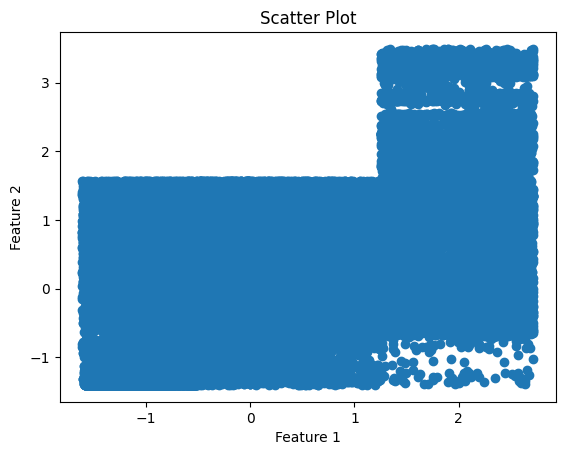

In [ ]:
# Scatter plot
plt.scatter(data_scaled.iloc[:, 0], data_scaled.iloc[:, 1])
plt.title("Scatter Plot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

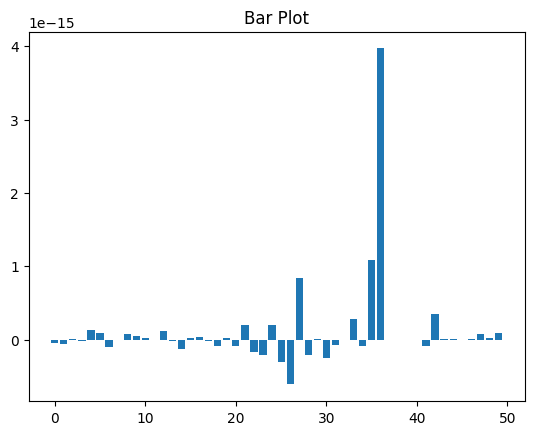

In [ ]:
# Bar Plot
plt.bar(range(len(mean_vals)), mean_vals)
plt.title("Bar Plot")
plt.show()

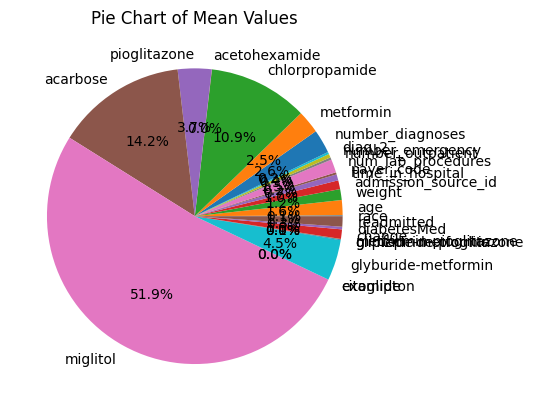

In [ ]:
plt.pie(mean_vals[mean_vals>=0], # Filter out negative values for pie chart
        labels=data.columns[mean_vals>=0], # Filter out corresponding labels
        autopct='%1.1f%%')
plt.title("Pie Chart of Mean Values")
plt.show()

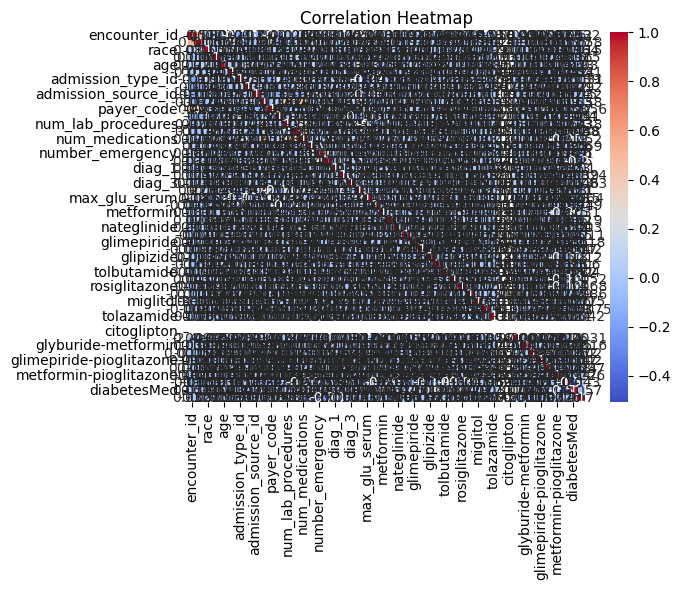

In [ ]:
# 4. Feature/Attribute Selection
# Correlation and heatmap
corr_matrix = data_scaled.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Check the actual column names in your DataFrame
print(data.columns)

# Assuming the target variable column is named 'readmitted' (replace with the correct name if different)
x = data.drop("readmitted", axis=1)
x.head(15)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,2278392.0,8222157.0,3,0,0,1,6.0,25.0,1.0,1.0,...,0,0,1,1,0,0,0,0,1,0
1,149190.0,55629189.0,3,0,1,1,1.0,1.0,7.0,3.0,...,0,0,3,1,0,0,0,0,0,1
2,64410.0,86047875.0,1,0,2,1,1.0,1.0,7.0,2.0,...,0,0,1,1,0,0,0,0,1,1
3,500364.0,82442376.0,3,1,3,1,1.0,1.0,7.0,2.0,...,0,0,3,1,0,0,0,0,0,1
4,16680.0,42519267.0,3,1,4,1,1.0,1.0,7.0,1.0,...,0,0,2,1,0,0,0,0,0,1
5,35754.0,82637451.0,3,1,5,1,2.0,1.0,2.0,3.0,...,0,0,2,1,0,0,0,0,1,1
6,55842.0,84259809.0,3,1,6,1,3.0,1.0,2.0,4.0,...,0,0,2,1,0,0,0,0,0,1
7,63768.0,114882984.0,3,1,7,1,1.0,1.0,7.0,5.0,...,0,0,1,1,0,0,0,0,1,1
8,12522.0,48330783.0,3,0,8,1,2.0,1.0,4.0,13.0,...,0,0,2,1,0,0,0,0,0,1
9,15738.0,63555939.0,3,0,9,1,3.0,3.0,4.0,12.0,...,0,0,2,1,0,0,0,0,0,1


In [ ]:
# 5. Classification
X = data_scaled.drop(columns=['readmitted'])  # Replace 'target' with the actual target column name
y = data_scaled['readmitted']

# Convert y to discrete values if it's continuous
# Check if y has continuous values
if pd.api.types.is_numeric_dtype(y):
    # If continuous, convert to discrete using a threshold or binning strategy
    # For example, using a threshold of 0:
    y = (y > 0).astype(int)  # Values above 0 become 1, others become 0
    # Alternatively, use pd.qcut for binning into quantiles

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train.shape,y_test.shape

((81412,), (20354,))

In [ ]:
X_train.shape,X_test.shape

((81412, 49), (20354, 49))

**Decision Tree**

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_train)
dt_preds = dt.predict(X_test)
print("Decision Tree Train Accuracy:", accuracy_score(y_train, dt_pred)*100)
print("Decision Tree Test Accuracy:", accuracy_score(y_test, dt_preds)*100)

Decision Tree Train Accuracy: 100.0
Decision Tree Test Accuracy: 57.92964527856932


In [ ]:
y_test# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_train)
lr_preds = lr.predict(X_test)
print("Logistic Regression Train Accuracy:", accuracy_score(y_train, lr_pred)*100)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, lr_preds)*100)

Logistic Regression Train Accuracy: 63.24251953029037
Logistic Regression Test Accuracy: 62.85251056303429


In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_train)
rf_preds = rf.predict(X_test)
print("Random Forest Train Accuracy:", accuracy_score(y_train, rf_pred)*100)
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_preds)*100)


Random Forest Train Accuracy: 100.0
Random Forest Test Accuracy: 66.35059447774393


In [ ]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_train)
nb_preds = nb.predict(X_test)
print("Naive Bayes Train Accuracy:", accuracy_score(y_train, nb_pred)*100)
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, nb_preds)*100)

Naive Bayes Train Accuracy: 58.598241045546104
Naive Bayes Test Accuracy: 58.82381841407095


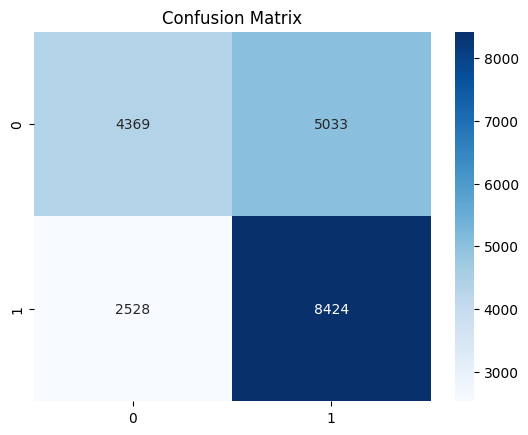

In [ ]:
conf_matrix = confusion_matrix(y_test, lr_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
y_preds=lr.predict(X_test)
print(confusion_matrix(y_test, y_preds, labels=[2,1,0]))
from sklearn.metrics import ConfusionMatrixDisplay

[[   0    0    0]
 [   0 8424 2528]
 [   0 5033 4369]]


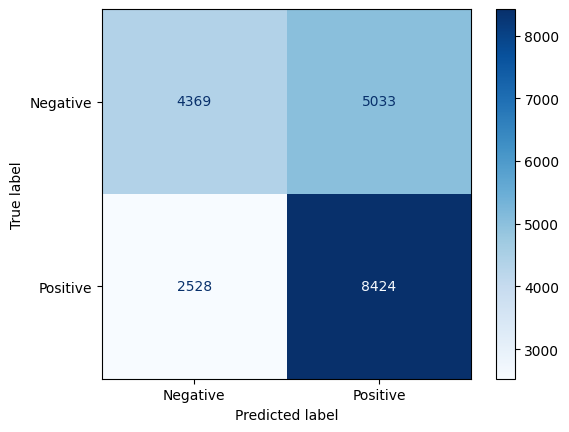

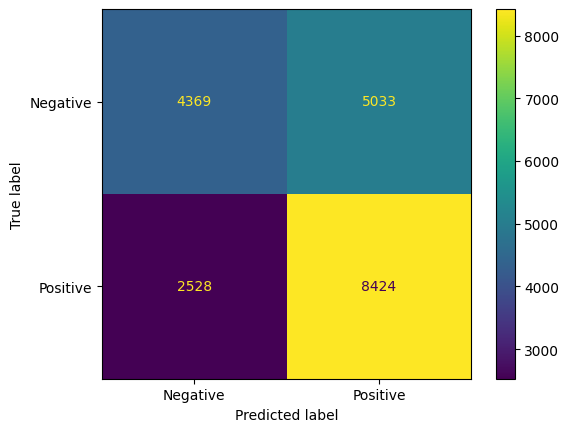

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
    lr,
    X_test,
    y_test,
    cmap='Blues',
    display_labels=['Negative', 'Positive']
)

disp.plot()
plt.show()

In [ ]:
print(confusion_matrix(y_test, y_preds, labels=[2,1,0]))

[[   0    0    0]
 [   0 8424 2528]
 [   0 5033 4369]]


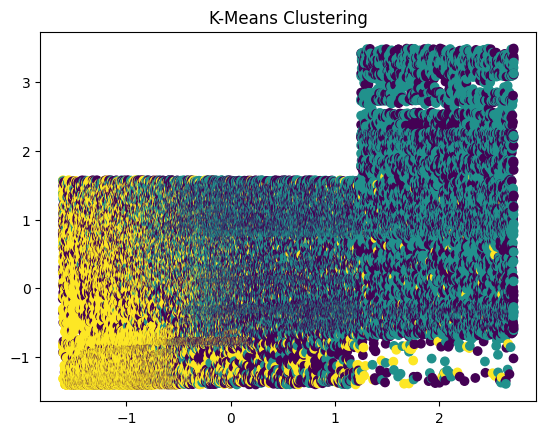

In [ ]:
# 6. Clustering
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.title("K-Means Clustering")
plt.show()

In [ ]:
# prompt: find out knn

from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train, X_test, y_train, y_test are already defined from previous code

# Initialize KNN classifier with k=5 (you can adjust this value)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
knn_preds = knn.predict(X_test)

# Evaluate the KNN classifier
knn_accuracy = accuracy_score(y_test, knn_preds)
print(f"KNN Test Accuracy: {knn_accuracy * 100:.2f}%")

# You can also print other evaluation metrics
print(classification_report(y_test, knn_preds))

KNN Test Accuracy: 59.06%
              precision    recall  f1-score   support

           0       0.56      0.54      0.55      9402
           1       0.62      0.64      0.63     10952

    accuracy                           0.59     20354
   macro avg       0.59      0.59      0.59     20354
weighted avg       0.59      0.59      0.59     20354



In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [ ]:
kmC=KNeighborsClassifier(n_neighbors=10)
kmC.fit(X_train,y_train)
kmC.score(X_train,y_train)*100

68.16931164938829

In [ ]:
# Cross Validation
cv_scores = cross_val_score(LogisticRegression(), X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.6125086  0.6305213  0.60841154 0.64496634 0.6053653 ]
Average Cross-Validation Score: 0.6203546159426343


In [ ]:
# 7. Neural Network
nn = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=500, random_state=42)
nn.fit(X_train, y_train)
nn_preds = nn.predict(X_test)
print("Neural Network Accuracy:", accuracy_score(y_test, nn_preds))
print("\nClassification Report:\n", classification_report(y_test, nn_preds))

Neural Network Accuracy: 0.6322590154269431

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.53      0.57      9402
           1       0.64      0.72      0.68     10952

    accuracy                           0.63     20354
   macro avg       0.63      0.62      0.62     20354
weighted avg       0.63      0.63      0.63     20354



In [ ]:
# Result Analysis
results = {
    "Model": ["Decision Tree", "Logistic Regression", "Random Forest", "Naive Bayes", "Neural Network"], # Removed 'SVM' from Model list
    "Accuracy": [
        accuracy_score(y_test, dt_preds),
        accuracy_score(y_test, lr_preds),
        accuracy_score(y_test, rf_preds),
        accuracy_score(y_test, nb_preds),
        accuracy_score(y_test, nn_preds),
    ]
}
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:\n", results_df)


Model Performance Comparison:
                  Model  Accuracy
0        Decision Tree  0.579296
1  Logistic Regression  0.628525
2        Random Forest  0.663506
3          Naive Bayes  0.588238
4       Neural Network  0.632259


In [ ]:
# Best Accuracy Table
print("\nBest Model:\n", results_df.loc[results_df['Accuracy'].idxmax()])


Best Model:
 Model       Random Forest
Accuracy         0.663506
Name: 2, dtype: object
